### Activate the auto-reload

In [162]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import the libraries

In [163]:
import sys
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

### Set file path to parent directory

In [164]:
sys.path.append(str(Path().resolve().parent / "src"))
os.chdir("../")

### Import the homemade functions

In [165]:
from src.data.data_import import DataImporter
from src.features.generate_features import GenerateFeatures
from src.descriptive_statistics.regression_employment import regression_employment
from src.descriptive_statistics.scatterplot import scatterplot
from src.descriptive_statistics.heatmap import heatmap 
from src.descriptive_statistics.regression_changes_employment import regression_changes_employment
from src.descriptive_statistics.histogram_pct_change_employment_trade import histogram_pct_change_employment_trade

### Get the API keys to access UN data

How-to available at this address: [https://uncomtrade.org/docs/api-subscription-keys/](https://uncomtrade.org/docs/api-subscription-keys/)

In [166]:
UN_API_KEY = "<YOUR_API_KEY>"

# 1. Import the data

In [167]:
importer = DataImporter(api_key=UN_API_KEY)
df = importer.get_merged_data()
df.head(2)

Reading merged data from: C:\Users\Gerwin\Documents\Tokyo university\1 Data Science\graspp-25S-trade\data\interim\merge.csv


,,Export,Import,ILO
country,year,,,
ABW,2010,124523218.0,1.071034e+09,6.738
AFG,2014,570534007.0,7.697178e+09,1389.950


# 2. Descriptive Statistics

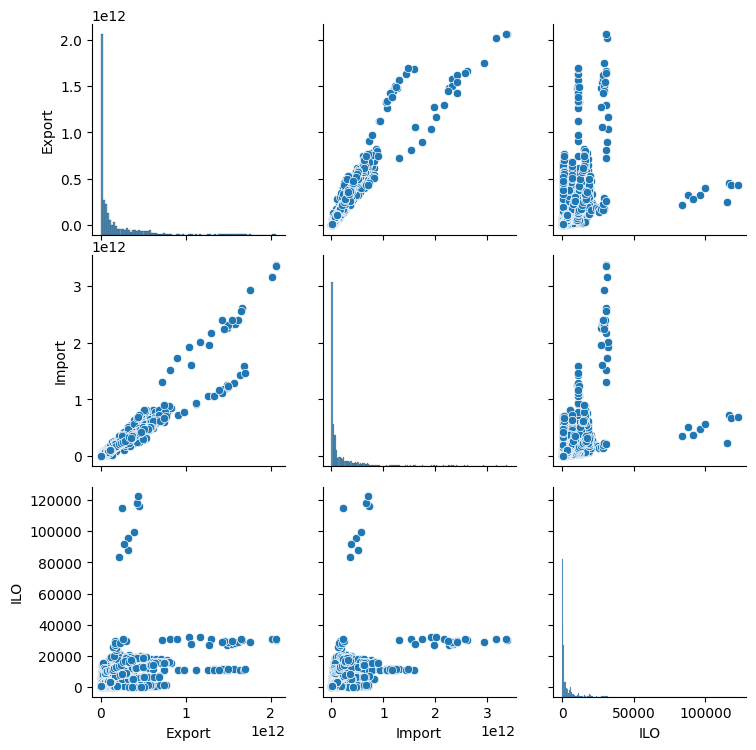

In [168]:
scatterplot(df)

# 3. Conducting Regression Analysis - Wanonno Iqtyider

                            OLS Regression Results                            
Dep. Variable:            Q("Export")   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     445.2
Date:                Mon, 26 May 2025   Prob (F-statistic):           5.59e-89
Time:                        12:16:17   Log-Likelihood:                -52620.
No. Observations:                1908   AIC:                         1.052e+05
Df Residuals:                    1906   BIC:                         1.053e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.367e+10   5.67e+09     16.516      0.0

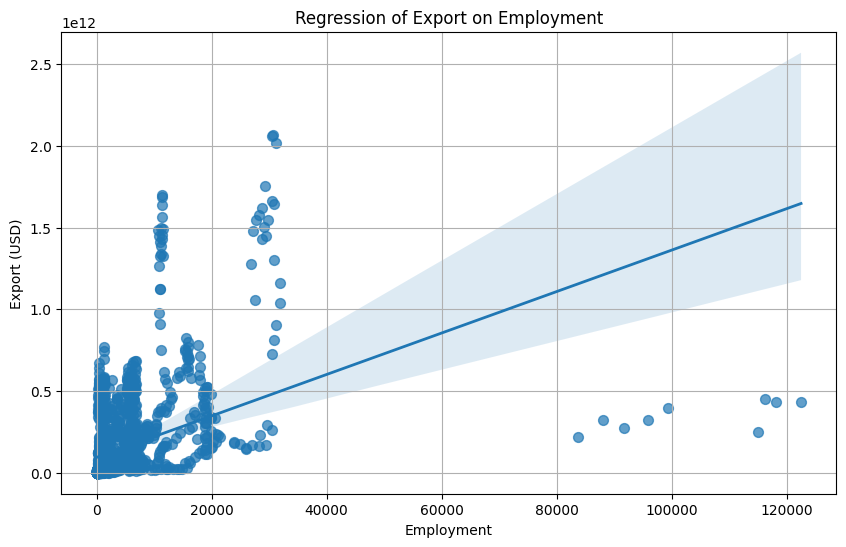

In [169]:
regression_employment(df)

# 4. Analysis on the correlation between changes in employment and trade volume - Yijing

## 4.1 Plotting the change in employment throughout countries using ILO dataset

In [170]:
print(df.columns)
df.head(2)

Index(['Export', 'Import', 'ILO'], dtype='object')


,,Export,Import,ILO
country,year,,,
ABW,2010,124523218.0,1.071034e+09,6.738
AFG,2014,570534007.0,7.697178e+09,1389.950


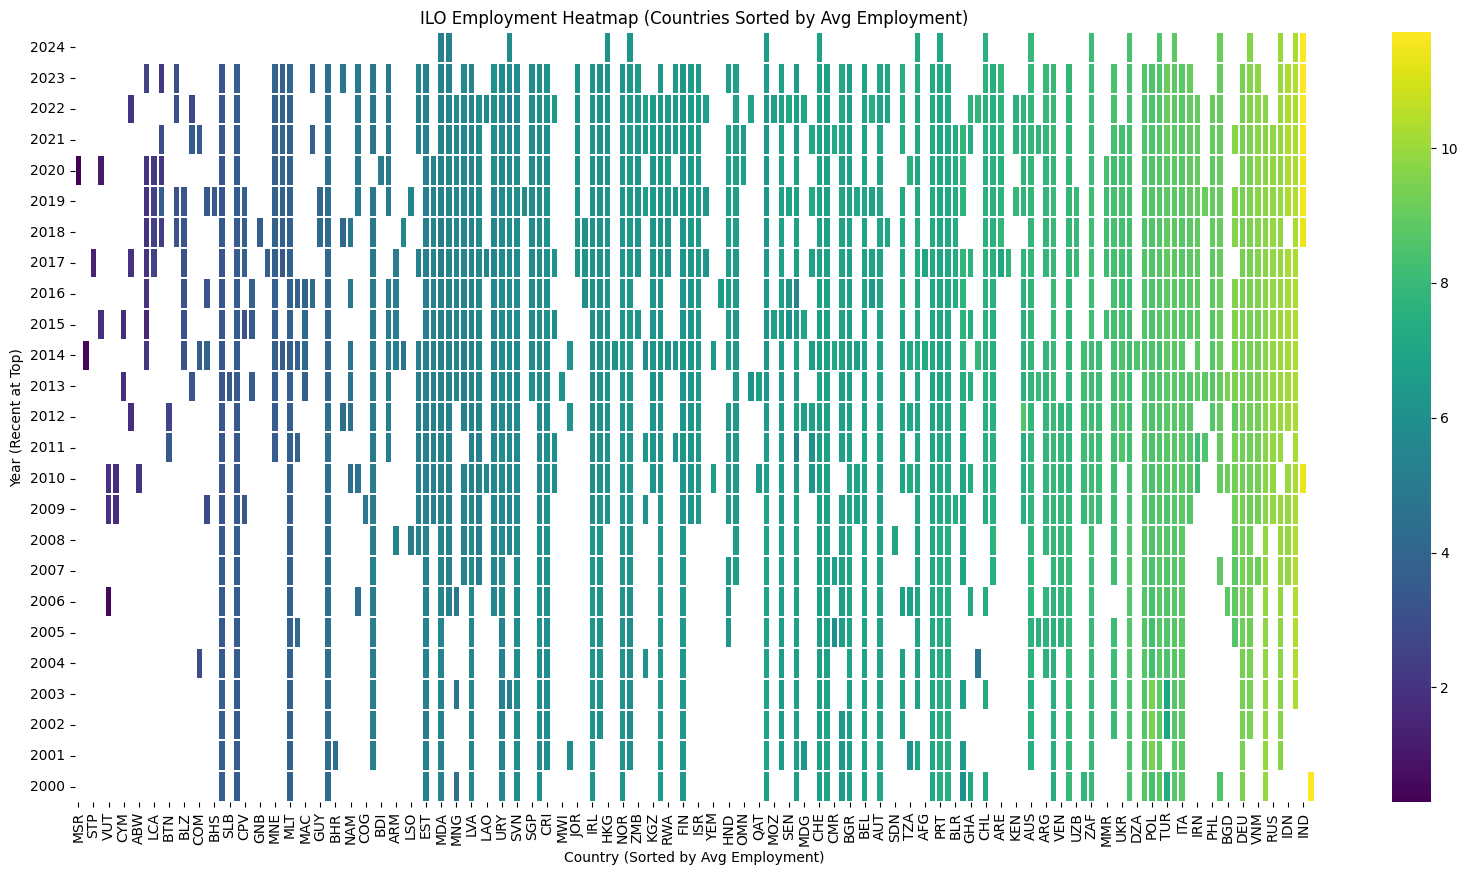

In [171]:
heatmap(df)

## 4.2 Regression analysis of the correlation between changes in employment and trade volume

c:\Users\Gerwin\Documents\Tokyo university\1 Data Science\graspp-25S-trade\src\features\generate_features.py:73: FutureWarning: The default fill_method='ffill' in DataFrameGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pct_change = group_obj[num_cols].pct_change().add_suffix(f'_chpct1{self.time_period}')


Correlation between percentage change in employment and trade volume: 0.18951664122133613


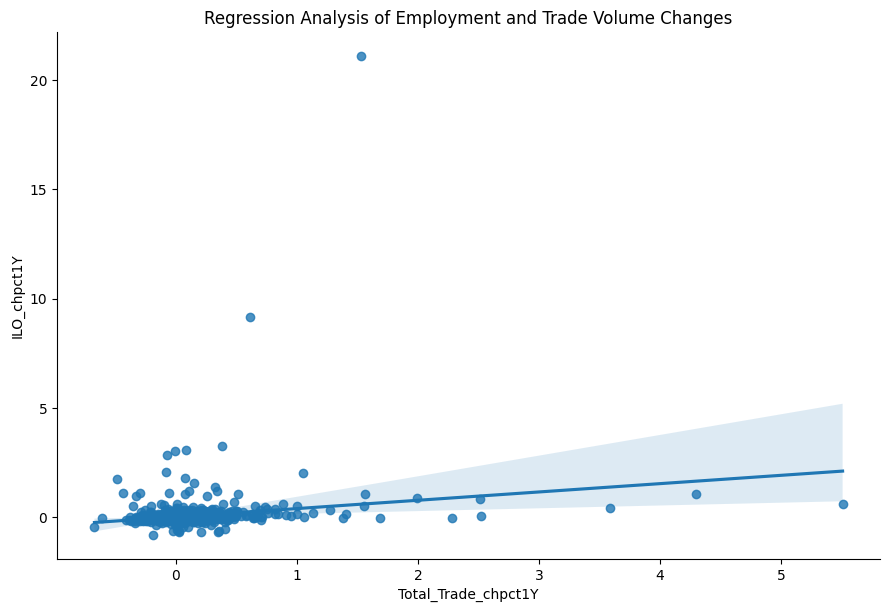

In [172]:
regression_changes_employment(df)

## 4.3 Histogram for percentage change in employment and trade

In [173]:
df['Total_Trade'] = df['Export'] + df['Import']
df_merge = df.sort_index()
# Percentage changes

features_generator = GenerateFeatures(time_period="Y")
df_features = features_generator.transform(df_merge)
df_clean = df_features.dropna(subset=['ILO_chpct1Y', 'Total_Trade_chpct1Y'])

c:\Users\Gerwin\Documents\Tokyo university\1 Data Science\graspp-25S-trade\src\features\generate_features.py:73: FutureWarning: The default fill_method='ffill' in DataFrameGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pct_change = group_obj[num_cols].pct_change().add_suffix(f'_chpct1{self.time_period}')


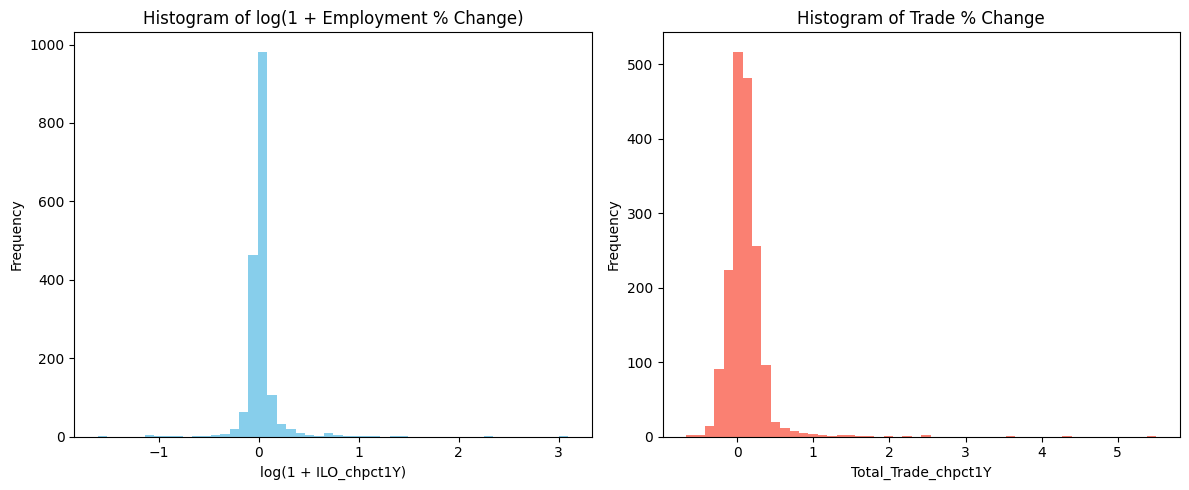

In [174]:
histogram_pct_change_employment_trade(df_clean)